## 📸 필터와 특징
### 필터링이란?:
임의의 함수를 적용하여 이미지를 향상 시킴 → 이미지 행렬 X 커널의 합성곱
#### 가우시안 블러
수정해야하는 픽셀은 커널에서 가장 높은 가중치를 가지며, 멀리 있는 픽셀에 대해 가중치가 감소

In [1]:
from PIL import Image
from PIL import ImageFilter

In [2]:
img = Image.open("image.jpg")
blur_img = img.filter(ImageFilter.GaussianBlur(5))
blur_img.show()

In [3]:
from skimage import io
from skimage import filters

<ipython-input-4-cb926f231ebb>:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  out = filters.gaussian(img, sigma=5)


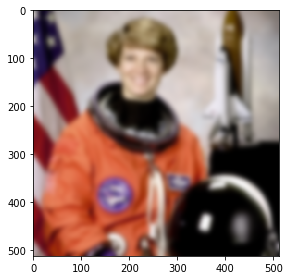

In [4]:
img = io.imread("image.jpg")
out = filters.gaussian(img, sigma=5)
io.imshow(out)
io.show()

#### 중간값 필터

In [5]:
img = Image.open("image.jpg")
blur_img = img.filter(ImageFilter.MedianFilter(7))
blur_img.show()

In [6]:
from skimage.morphology import disk
from skimage import color
from skimage import filters

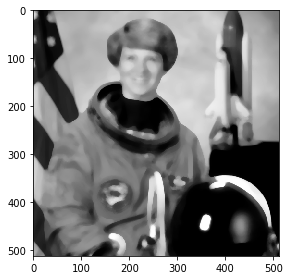

In [7]:
img = io.imread("image.jpg")
img = color.rgb2gray(img)
out = filters.median(img,disk(7))
io.imshow(out)
io.show()

### 팽창과 침식
Morphology 연산을 토대로 이미지의 전체 구조는 유지하면서 이미지를 처리함  
⚠ Unsupported dtype error
####  침식
* 노이즈 제거

In [8]:
from skimage import morphology
from skimage import io

In [ ]:
img = io.imread("image.png")
eroded_img = morphology.binary_erosion(img)
io.imshow(eroded_img)
io.show()

#### 팽창
* 틈/구멍을 메우고 싶을 때 사용

In [12]:
from skimage import morphology
from skimage import io

In [ ]:
img = io.imread("image.jpg")
dilated_img = morphology.binary_dilation(img)
io.imshow(dilated_img)
io.show()

### 커스텀 필터

In [22]:
from PIL import ImageFilter
from PIL import Image

In [46]:
img = Image.open("image.jpg")
img = img.convert("L")

new_img = img.filter(ImageFilter.Kernel((3,3),[1,0,-1,5,0,-5,1,0,1]))
new_img.show()

### 이미지 임계 처리
색상 값을 흰색 또는 검은색으로 변경하는 것을 의미

In [40]:
from skimage.filters import threshold_otsu,threshold_local
from skimage.color import rgb2gray

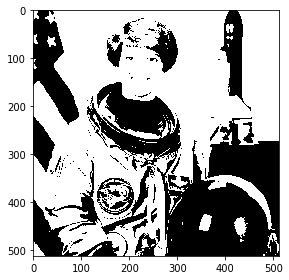

In [38]:
img = imread("image.jpg")
img = rgb2gray(img)
thresh_value = threshold_otsu(img)
thresh_img = img > thresh_value
io.imshow(thresh_img)
io.show()

#### 연습문제

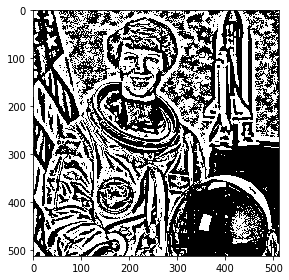

In [43]:
img = imread("image.jpg")
img = rgb2gray(img)
thresh_value = threshold_local(img, 15, "mean")
thresh_img = img > thresh_value
io.imshow(thresh_img)
io.show()

### 에지 검출
구조와 물체 경계에 대해 알 수 있으며, 픽셀 값의 변화를 찾는 방법.
#### 소벨 에지 검출기
큰 크기의 Gradient value를 갖는 픽셀을 찾는 것(변화가 큰 값) → 에지의 픽셀 값은 이웃 픽셀과 달리 크게 변화하기 때문.

In [44]:
from skimage import io
from skimage import filters
from skimage import color

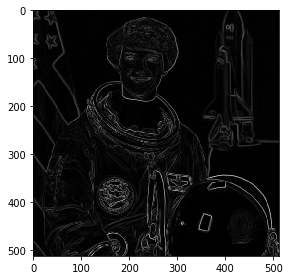

In [45]:
img = io.imread("image.jpg")
img = color.rgb2gray(img)
edge = filters.sobel(img)
io.imshow(edge)
io.show()

#### 캐니 에지 검출기
에지를 찾기 위해 그래디언트 방향 고려
1. 부드럽게 하기: 가우시안 필터를 이용해 노이즈 줄이기
2. 그래디언트 찾기: 그래디언트 크기와 방향 찾기
3. 비최대 억제(nonmaximal supression): 그랜디언트 방향의 지역 최댓값인지 확인
4. 입계값 처리: 높은 인계값과 낮은 임계값 사용(히스테리시스 임계값)

In [48]:
from skimage import io
from skimage import feature
from skimage import color

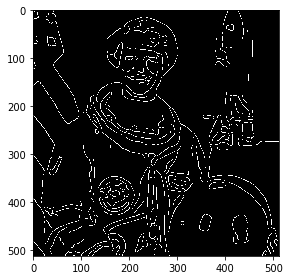

In [49]:
img = io.imread("image.jpg")
img = color.rgb2gray(img)
edge = feature.canny(img,3)
io.imshow(edge)
io.show()

### Hough 직선

In [51]:
from skimage.transform import hough_line, probabilistic_hough_line
from skimage.feature import canny
from skimage import io, color

In [52]:
image = io.imread('image.jpg')
image = color.rgb2gray(image)
edges = canny(image,2,1,25)
lines = hough_line(image)
probabilistic_lines = probabilistic_hough_line(edges, threshold=10,line_length=5, line_gap=3)

💡 항상 에지에서만 Hough 변환을 실행해야 하는 이유:  
* 교점의 좌표(r,theta평면위의)를 가지고 (xy평면에)직선을 그리면 n개의 점을 가지고 있는 직선을 그릴 수 있는 것이다.   
위와 같은 과정을 통해 우리는 어떤 선 위에 점이 몇 개 올라와 있는지 그 개수를 파악할 수 있게 되었다.  
코딩할 때에는 이미지가 디지털 같이 정수로 딱딱 끊어지기 때문에 어떤 픽셀에서 몇 번 겹쳐지는가에 대해서 파악하기 쉽다. [출처 위키백과]    
* 이 개념은 쉽게 정리하자면, 기본적으로 직선은 한 점에 대해 무한한 기울기와 절편에 대해 쌍을 갖게 된다.   
이 때 한 m,c에 관하여 무수히 많은 교점들이 존재하면, 해당 영상에서는 m,c에 해당하는 직선 정보가 있다는 확률이 높다는 뜻이다.    
이 정보를 이용하여 에지 검출을 하게 되며 이미지에 대한 고정된 모양을 검출할 수 있다.